In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

In [23]:
from NFconstants import N_nod, Beta
from transforms import t_get_O
from flows.NormalizingFlow import NormalizingFlow    
from flows.RGflows import RGflows    
from setup import osc, anh, morse, tw, columb, rel_osc, rel_morse, rel_tw, rel_columb, ur 
from obs import G, calc_Loss, calc_psi2, gen_fun_W
normal_dist = torch.distributions.Normal(loc=torch.zeros(N_nod), scale=torch.ones(N_nod))

In [25]:
RG_trained = RGflows.load_model("./weights/model_weights_anh.pth")
RG_trained.eval()
#RG_trained.set_type("double")

RGflows(
  (nflist): ModuleList(
    (0): NormalizingFlow(
      (flows): ModuleList(
        (0-3): 4 x AffineCouplingLayer(
          (theta): ThetaNetwork(
            (input): Linear(in_features=4, out_features=8, bias=True)
            (hidden): ModuleList(
              (0-5): 6 x Sequential(
                (0): Linear(in_features=8, out_features=8, bias=True)
                (1): Dropout(p=0.0, inplace=False)
                (2): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
              )
            )
            (dims): Linear(in_features=8, out_features=8, bias=True)
          )
        )
      )
    )
    (1): NormalizingFlow(
      (flows): ModuleList(
        (0-3): 4 x AffineCouplingLayer(
          (theta): ThetaNetwork(
            (input): Linear(in_features=12, out_features=8, bias=True)
            (hidden): ModuleList(
              (0-5): 6 x Sequential(
                (0): Linear(in_features=8, out_features=8, bias=True)
                (1): Dropout(p=0.

In [4]:
import torch
from samplers.Langevin import Langevin
N_samp=1000
z=torch.normal(mean=torch.zeros(N_samp,N_nod), std=torch.ones(N_samp,N_nod))
L=Langevin(ur,N_samp,eps=0.0001,N_sweep=1000000,log_per=1000)
L.run(z)

tensor(0.9940)
tensor(0.9200)
tensor(0.8639)


KeyboardInterrupt: 

In [4]:
from samplers.Metropolis import Metropolis
z = torch.normal(mean=torch.zeros(1,N_nod), std=torch.ones(1,N_nod))
M = Metropolis(anh,N_samp=1,d=4/N_nod,N_sweep=100000,log_per=10000,filename="./trajs_and_corr/0.txt")
M.run(z)

tensor(1.0054) 0
tensor(0.6273) tensor(1.)
tensor(0.3880) tensor(0.)
tensor(0.2519) tensor(0.)
tensor(0.1798) tensor(1.)
tensor(0.1508) tensor(1.)
tensor(0.1350) tensor(1.)
tensor(0.1251) tensor(1.)
tensor(0.1149) tensor(1.)
tensor(0.1073) tensor(1.)


tensor([[-0.2009, -0.2442, -0.3794,  ..., -0.2116, -0.1759, -0.3423]])

In [26]:
print(N_nod)

1024


In [59]:
from samplers.Metropolis import Metropolis
z = torch.tensor(np.genfromtxt("./trajs_and_corr/0.txt")).float()
z = torch.reshape(z,(1,N_nod))
print(z.shape)
print(len(z))
M = Metropolis(anh,len(z),model = RG_trained,latent=normal_dist,d=4/N_nod,n_us=1,N_sweep=15000,log_per=10,filename="./trajs_and_corr/1.txt")
M.run(z)

torch.Size([1, 1024])
1
tensor(0.1112) 0 0
tensor(0.2019) tensor(1.) tensor(1.)
tensor(0.2793) tensor(1.) tensor(1.)
tensor(0.2036) tensor(0.) tensor(0.)
tensor(0.2737) tensor(1.) tensor(1.)
tensor(0.1553) tensor(1.) tensor(1.)
tensor(0.3334) tensor(1.) tensor(1.)
tensor(0.2587) tensor(1.) tensor(1.)
tensor(0.2113) tensor(0.) tensor(0.)
tensor(0.2137) tensor(0.) tensor(0.)
tensor(0.2256) tensor(1.) tensor(1.)
tensor(0.2459) tensor(1.) tensor(1.)
tensor(0.1794) tensor(0.) tensor(0.)
tensor(0.2484) tensor(1.) tensor(1.)
tensor(0.2206) tensor(1.) tensor(1.)
tensor(0.2629) tensor(1.) tensor(1.)
tensor(0.1932) tensor(0.) tensor(0.)
tensor(0.1986) tensor(1.) tensor(1.)
tensor(0.3117) tensor(1.) tensor(1.)
tensor(0.3109) tensor(1.) tensor(1.)
tensor(0.1661) tensor(0.) tensor(0.)
tensor(0.1778) tensor(1.) tensor(1.)
tensor(0.3204) tensor(0.) tensor(0.)
tensor(0.2307) tensor(1.) tensor(1.)
tensor(0.2809) tensor(1.) tensor(1.)
tensor(0.3062) tensor(1.) tensor(1.)
tensor(0.2294) tensor(0.) tensor

tensor([[0.1665, 0.1553, 0.1091,  ..., 0.4459, 0.3001, 0.2541]])

In [63]:
z = torch.torch.tensor(np.genfromtxt("./trajs_and_corr/1.txt")).double()
print(z.shape)
g=G(z,n_p=1)

torch.Size([15000, 1024])


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:16<00:00, 16.58s/it]


In [14]:
g_ur = np.genfromtxt("./trajs_and_corr/g_ur N=256 Beta=16")

In [16]:
from systems.Nonrel.osc_andist import calc_G
g_osc=calc_G(N_nod,Beta,N_nod)

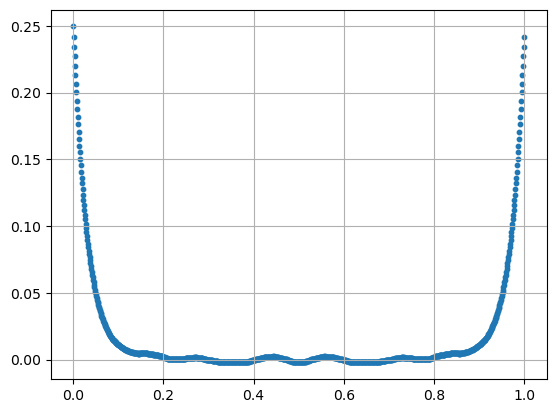

In [55]:
plt.figure()
plt.scatter(np.linspace(0,1,len(g)),g,s=10)
#plt.scatter(np.linspace(0,1,len(g_ur)),g_ur,s=10)
plt.grid(True)
plt.savefig("./pictures/anh_green1")
plt.show()

In [65]:
print(g[0])

0.2513987636240472
